# Binary Classification
- Pima Indians Diabetes Database
- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- "The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset."
- Outcome: Diabetic (1) or not diabetic (0)
- Parts of this script is adapted from https://www.kaggle.com/code/satishgunjal/binary-multiclass-classification-using-sklearn

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/EunCheolChoi0123/COMM557Tutorial/refs/heads/main/Tutorial%209%20Supervised%20Learning%20(1)/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


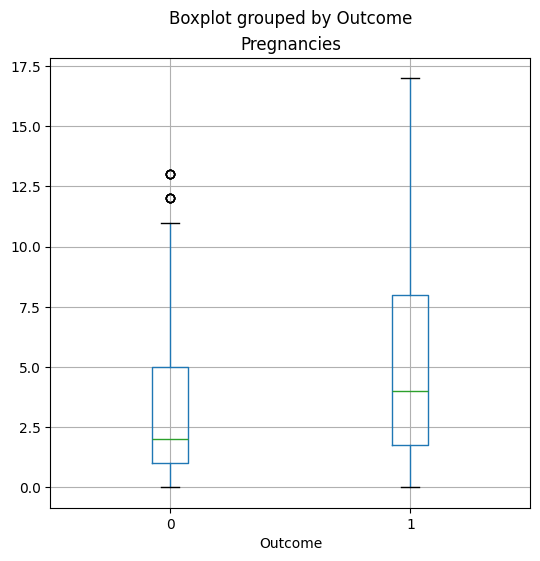

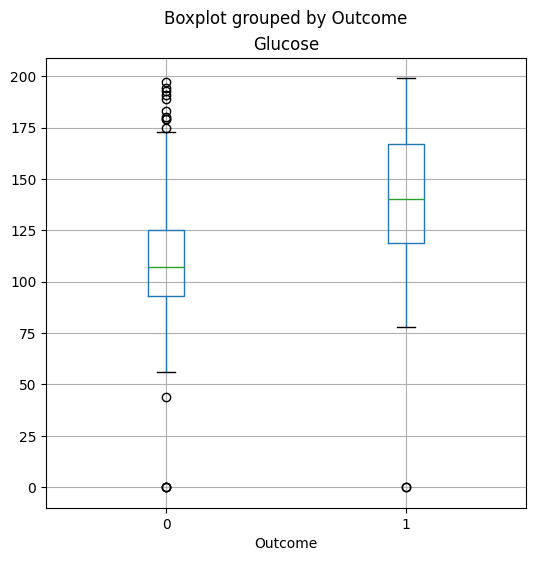

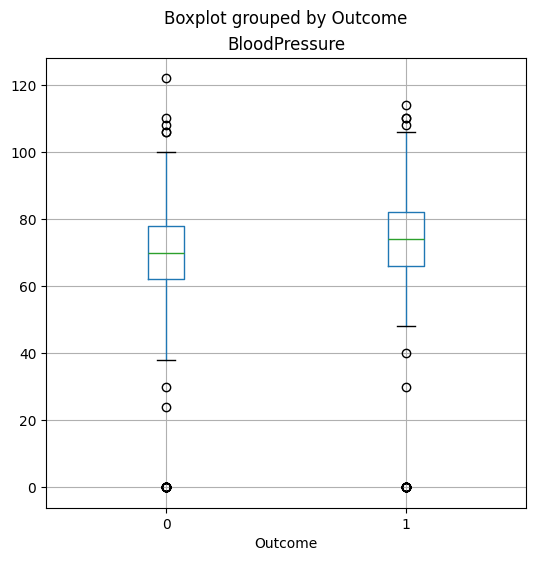

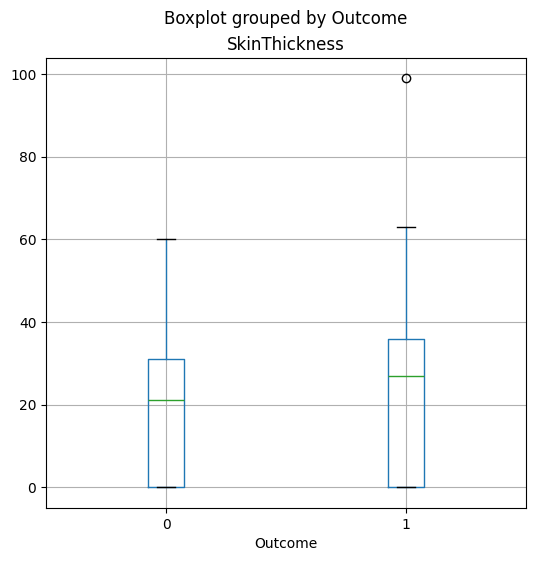

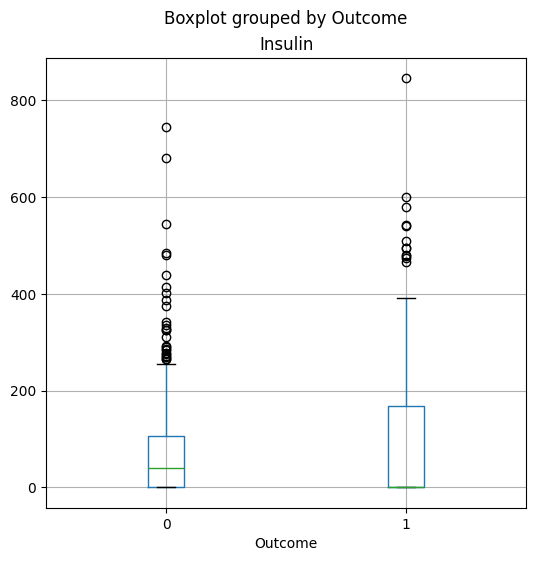

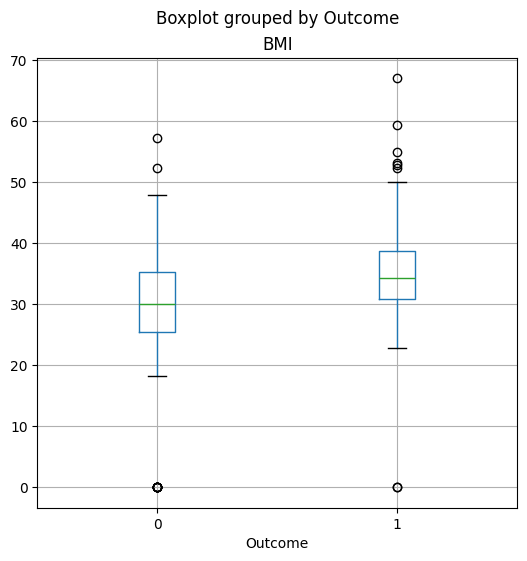

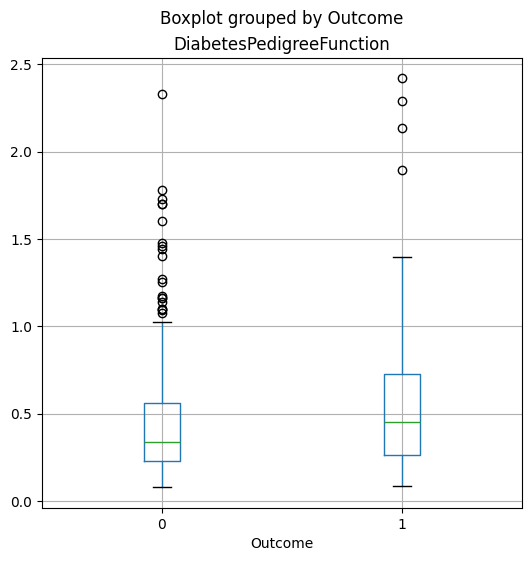

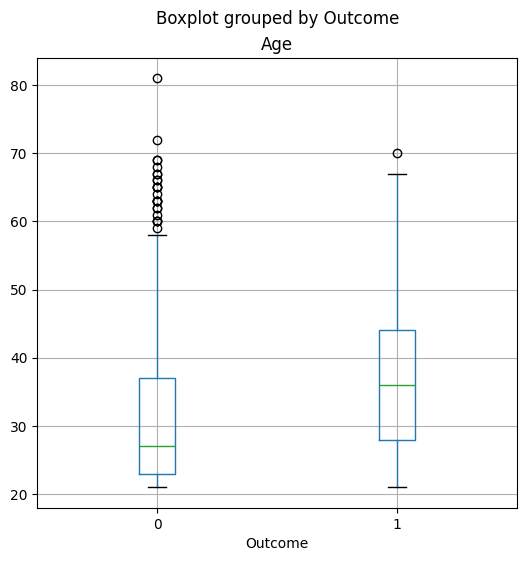

In [ ]:
# Boxplot for each features, separated by the outcome label
# Which features do you think explain diabetes better than others?

features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in features:
    df.boxplot(column=col, by='Outcome', figsize=(6,6))
    plt.title(col)
plt.show()

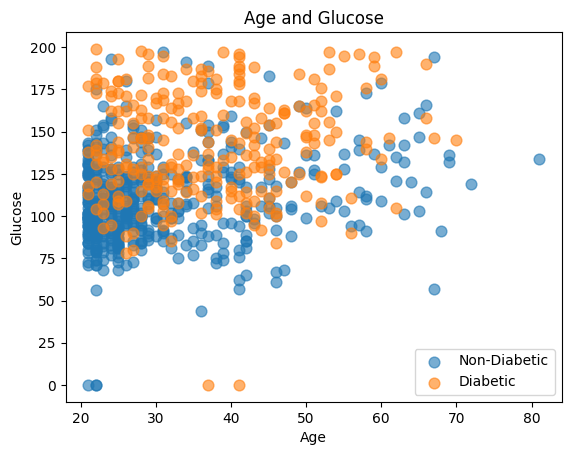

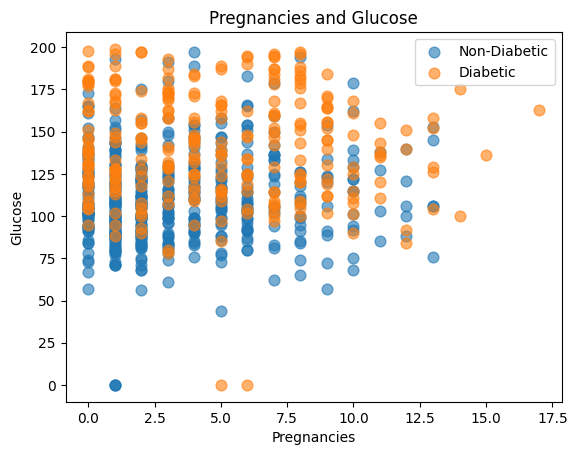

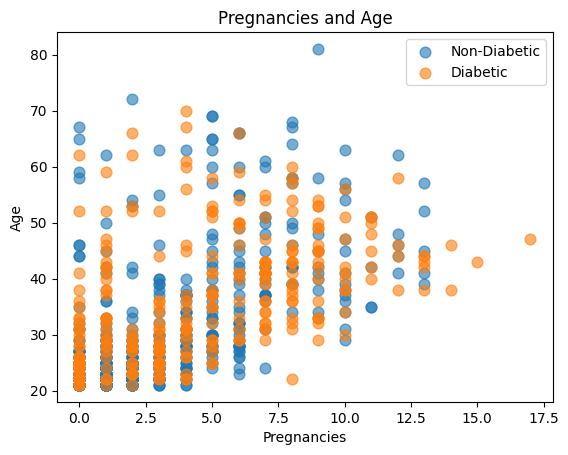

In [ ]:
# Scatterplot
# Let's visualize some pairs of variables that seems like to explain diebetes better

def draw_scatter(df, x_feature, y_feature, label_col='Outcome', class_names=None):
    """
    Draws a scatter plot for two selected features colored by class label.

    Parameters:
        df (pd.DataFrame): dataset with features and labels
        x_feature (str): name of the feature on x-axis
        y_feature (str): name of the feature on y-axis
        label_col (str): name of the label column (default 'Outcome')
        class_names (dict): optional mapping {0: 'Non-Diabetic', 1: 'Diabetic'}
    """

    labels = df[label_col].values
    data = df[[x_feature, y_feature]].values
    unique_labels = sorted(df[label_col].unique())

    for label in unique_labels:
        idx = labels == label
        if class_names is not None:
            label_name = class_names.get(label, str(label))
        else:
            label_name = str(label)
        plt.scatter(data[idx, 0], data[idx, 1], alpha=0.6, s=60, label=label_name)

    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend()
    plt.title(f"{x_feature} and {y_feature}")
    plt.show()


class_names = {0: 'Non-Diabetic', 1: 'Diabetic'}

# Select only a few pairs to visualize
feature_pairs = [
    ('Age', 'Glucose'),
    ('Pregnancies', 'Glucose'),
    ('Pregnancies', 'Age')
]

for x, y in feature_pairs:
    draw_scatter(df, x, y, label_col='Outcome', class_names=class_names)


In [ ]:
# Instantiate Decision Tree classifier
from sklearn import neighbors, tree, cluster

clf = tree.DecisionTreeClassifier()

Accuracy: 0.6948051948051948
Precision: 0.6666666666666666
Recall: 0.25925925925925924
F1 Score: 0.37333333333333335

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.70      0.93      0.80       100
    Diabetic       0.67      0.26      0.37        54

    accuracy                           0.69       154
   macro avg       0.68      0.59      0.59       154
weighted avg       0.69      0.69      0.65       154



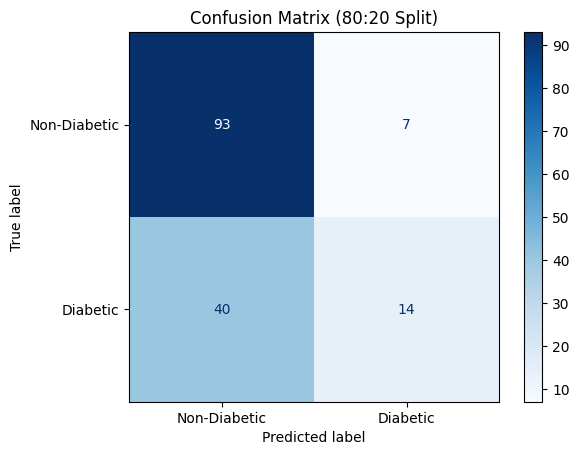

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

# Define features (X) and target (y)
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train and predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Compute metrics
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", pre)
print("Recall:", rec)
print("F1 Score:", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# Confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=['Non-Diabetic', 'Diabetic'], cmap='Blues'
)
disp.ax_.set_title("Confusion Matrix (80:20 Split)")
plt.show()


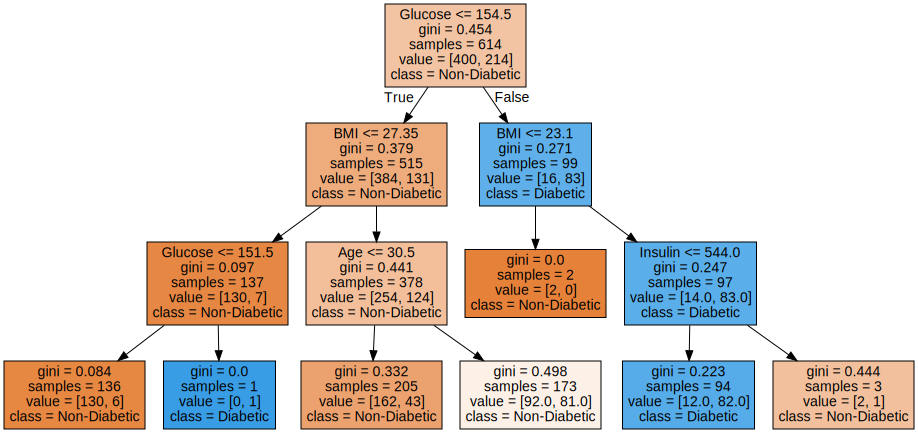

In [ ]:
import graphviz

# To visualize the tree using graphviz (you must have graphviz installed)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=df.columns[:-1],  # replace with your feature names
                                class_names=['Non-Diabetic', 'Diabetic'],  # replace with your class names
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree")
graph


=== Fold 1 ===
TRAIN SAMPLE SIZE: 614
TEST SAMPLE SIZE: 154
Predicted:  [1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 0 0]
Correct:    [1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 1 1 0 0 0]
              precision    recall  f1-score   support

Non-Diabetic       0.80      0.84      0.82        99
    Diabetic       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg   

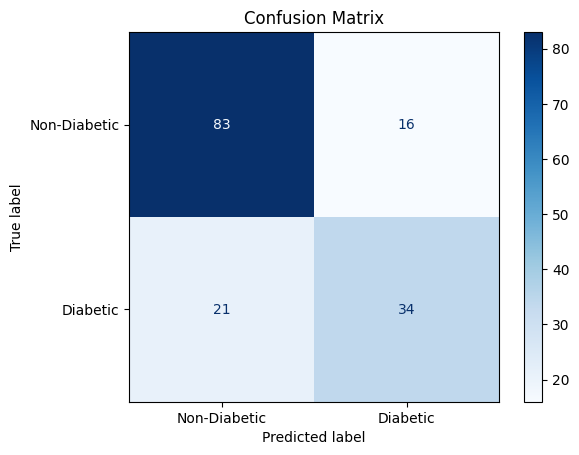


=== Fold 2 ===
TRAIN SAMPLE SIZE: 614
TEST SAMPLE SIZE: 154
Predicted:  [0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
Correct:    [1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 1]
              precision    recall  f1-score   support

Non-Diabetic       0.75      0.93      0.83       107
    Diabetic       0.67      0.30      0.41        47

    accuracy                           0.74       154
   macro avg       0.71      0.62      0.62       154
weighted avg   

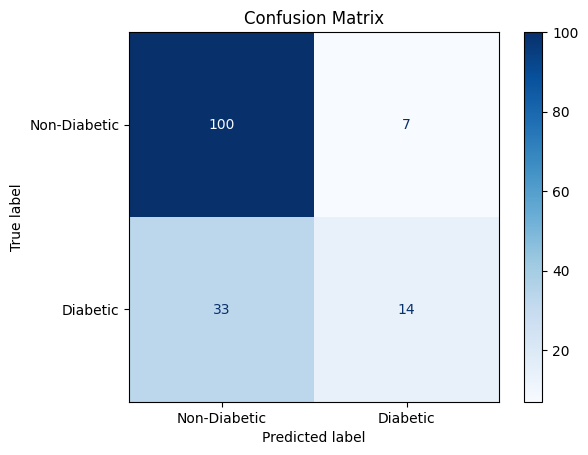


=== Fold 3 ===
TRAIN SAMPLE SIZE: 614
TEST SAMPLE SIZE: 154
Predicted:  [1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0
 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0]
Correct:    [1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0
 1 0 0 1 1 0]
              precision    recall  f1-score   support

Non-Diabetic       0.77      0.85      0.81        93
    Diabetic       0.73      0.61      0.66        61

    accuracy                           0.75       154
   macro avg       0.75      0.73      0.73       154
weighted avg   

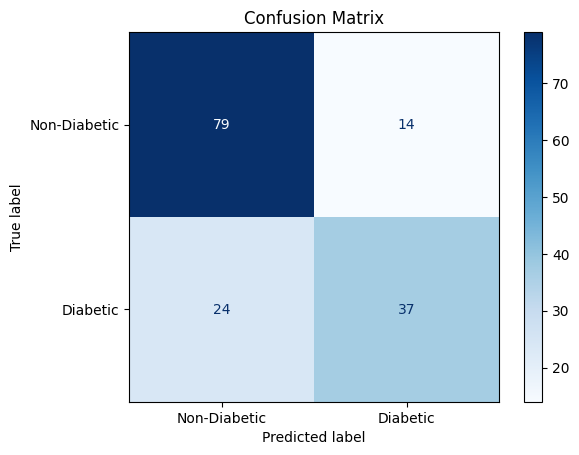


=== Fold 4 ===
TRAIN SAMPLE SIZE: 615
TEST SAMPLE SIZE: 153
Predicted:  [0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1]
Correct:    [0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 0 1 0 1]
              precision    recall  f1-score   support

Non-Diabetic       0.82      0.89      0.85       106
    Diabetic       0.68      0.55      0.61        47

    accuracy                           0.78       153
   macro avg       0.75      0.72      0.73       153
weighted avg       

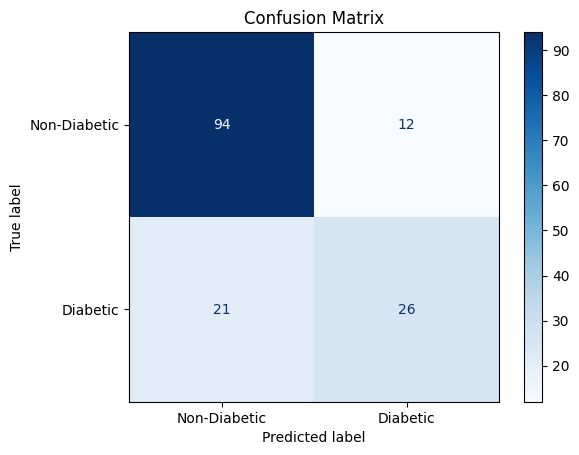


=== Fold 5 ===
TRAIN SAMPLE SIZE: 615
TEST SAMPLE SIZE: 153
Predicted:  [0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0
 0 1 1 1 0]
Correct:    [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1
 0 1 0 1 0]
              precision    recall  f1-score   support

Non-Diabetic       0.74      0.83      0.78        95
    Diabetic       0.65      0.52      0.58        58

    accuracy                           0.71       153
   macro avg       0.70      0.67      0.68       153
weighted avg       

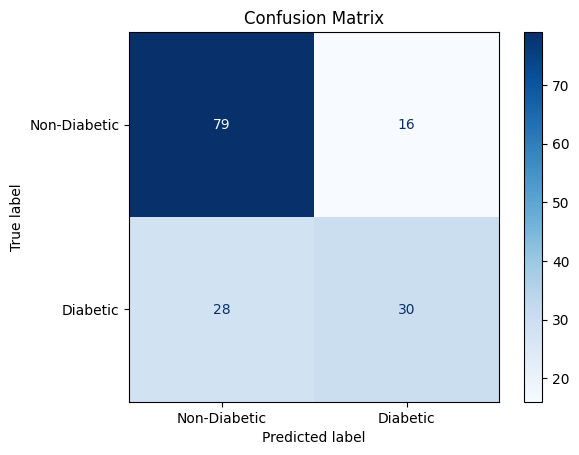

Average accuracy across folds: 0.7499957558781088
Average precision across folds: 0.6817082604208732
Average recall across folds: 0.5186088808657154
Average f1 across folds: 0.5817571644042232


In [ ]:
# Cross-validation
# Deciding which hyperparameters to use

from sklearn.model_selection import KFold
import numpy as np

# Define features (X) and target (y)
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

def draw_confusion_matrix(y_true, y_pred, class_names):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred, display_labels=class_names, cmap='Blues'
    )
    disp.ax_.set_title("Confusion Matrix")
    plt.show()

# Run the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    clf = DecisionTreeClassifier(max_depth=3, random_state=42)

    print(f"\n=== Fold {fold+1} ===")
    print("TRAIN SAMPLE SIZE:", len(train_index))
    print("TEST SAMPLE SIZE:", len(test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)

    print("Predicted: ", y_pred)
    print("Correct:   ", y_test)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

    draw_confusion_matrix(y_test, y_pred, ['Non-Diabetic', 'Diabetic'])
    precision_scores.append(pre)
    recall_scores.append(rec)
    f1_scores.append(f1)
    accuracy_scores.append(acc)

print("Average accuracy across folds:", np.mean(accuracy_scores))
print("Average precision across folds:", np.mean(precision_scores))
print("Average recall across folds:", np.mean(recall_scores))
print("Average f1 across folds:", np.mean(f1_scores))



=== Fold 1 ===
TRAIN SAMPLE SIZE: 614
TEST SAMPLE SIZE: 154
Predicted:  [0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0
 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 0 0]
Correct:    [1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 1 1 0 0 0]
              precision    recall  f1-score   support

Non-Diabetic       0.81      0.88      0.84        99
    Diabetic       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg   

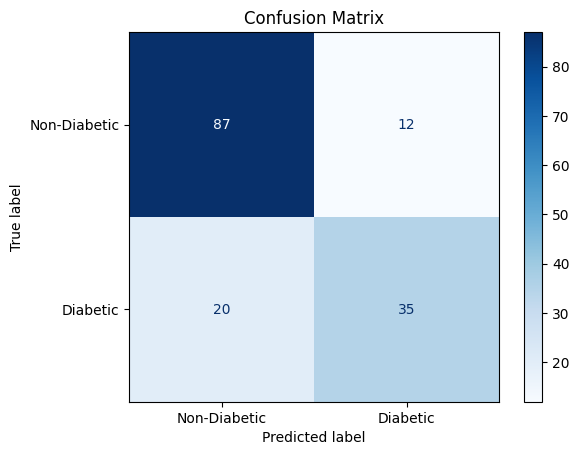


=== Fold 2 ===
TRAIN SAMPLE SIZE: 614
TEST SAMPLE SIZE: 154
Predicted:  [0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0]
Correct:    [1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 1]
              precision    recall  f1-score   support

Non-Diabetic       0.81      0.85      0.83       107
    Diabetic       0.62      0.55      0.58        47

    accuracy                           0.76       154
   macro avg       0.72      0.70      0.71       154
weighted avg   

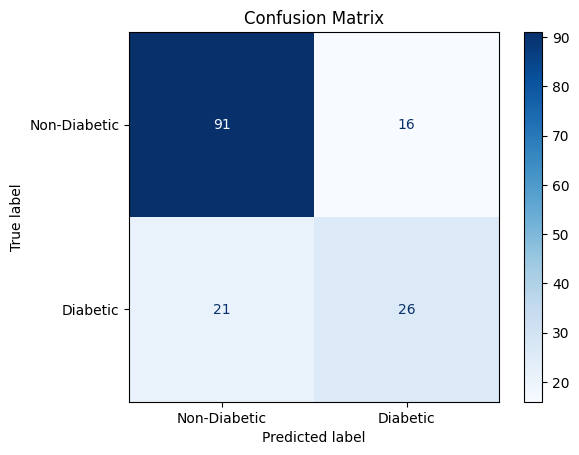


=== Fold 3 ===
TRAIN SAMPLE SIZE: 614
TEST SAMPLE SIZE: 154
Predicted:  [1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0]
Correct:    [1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0
 1 0 0 1 1 0]
              precision    recall  f1-score   support

Non-Diabetic       0.75      0.91      0.82        93
    Diabetic       0.80      0.52      0.63        61

    accuracy                           0.76       154
   macro avg       0.77      0.72      0.73       154
weighted avg   

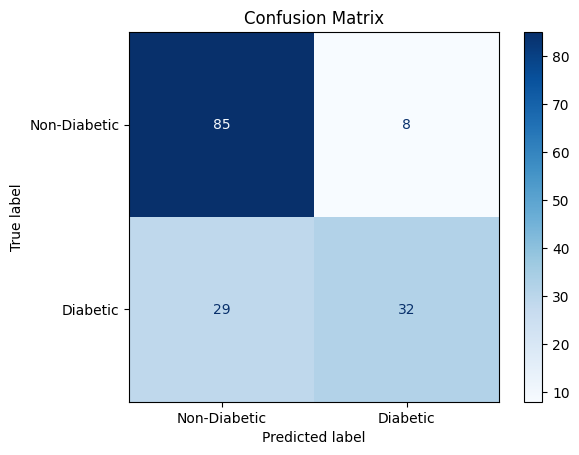


=== Fold 4 ===
TRAIN SAMPLE SIZE: 615
TEST SAMPLE SIZE: 153
Predicted:  [0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 1]
Correct:    [0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 0 1 0 1]
              precision    recall  f1-score   support

Non-Diabetic       0.84      0.87      0.86       106
    Diabetic       0.68      0.64      0.66        47

    accuracy                           0.80       153
   macro avg       0.76      0.75      0.76       153
weighted avg       

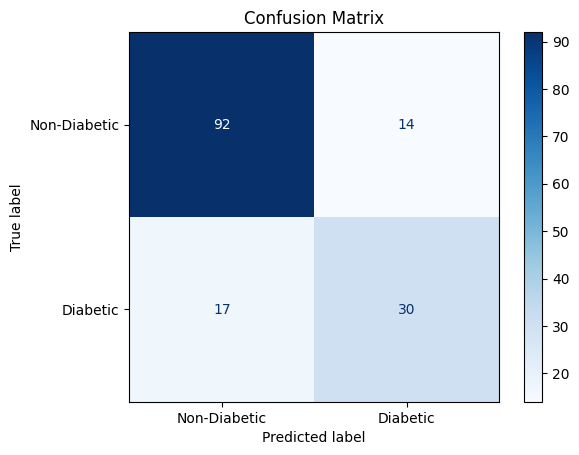


=== Fold 5 ===
TRAIN SAMPLE SIZE: 615
TEST SAMPLE SIZE: 153
Predicted:  [0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 0]
Correct:    [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1
 0 1 0 1 0]
              precision    recall  f1-score   support

Non-Diabetic       0.77      0.86      0.81        95
    Diabetic       0.72      0.57      0.63        58

    accuracy                           0.75       153
   macro avg       0.74      0.72      0.72       153
weighted avg       

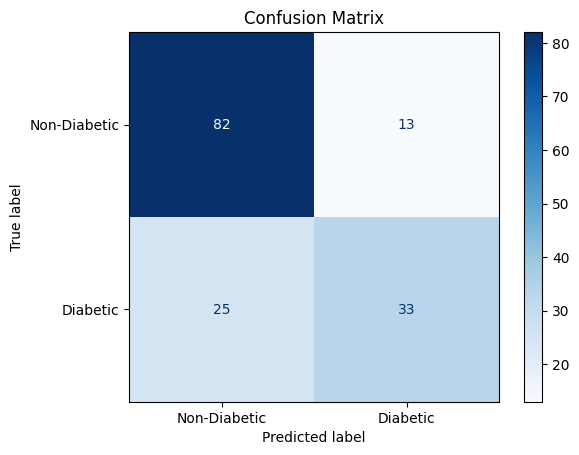

Average accuracy across folds: 0.7721415839062897
Average precision across folds: 0.7125875912554914
Average recall across folds: 0.5842817358483139
Average f1 across folds: 0.6396327166035896


In [ ]:
# Run the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    clf = DecisionTreeClassifier(max_depth=5, random_state=42)

    print(f"\n=== Fold {fold+1} ===")
    print("TRAIN SAMPLE SIZE:", len(train_index))
    print("TEST SAMPLE SIZE:", len(test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)

    print("Predicted: ", y_pred)
    print("Correct:   ", y_test)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

    draw_confusion_matrix(y_test, y_pred, ['Non-Diabetic', 'Diabetic'])
    precision_scores.append(pre)
    recall_scores.append(rec)
    f1_scores.append(f1)
    accuracy_scores.append(acc)

print("Average accuracy across folds:", np.mean(accuracy_scores))
print("Average precision across folds:", np.mean(precision_scores))
print("Average recall across folds:", np.mean(recall_scores))
print("Average f1 across folds:", np.mean(f1_scores))



=== Fold 1 ===
TRAIN SAMPLE SIZE: 614
TEST SAMPLE SIZE: 154
Predicted:  [1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0
 0 1 1 0 0 0]
Correct:    [1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 1 1 0 0 0]
              precision    recall  f1-score   support

Non-Diabetic       0.80      0.78      0.79        99
    Diabetic       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg   

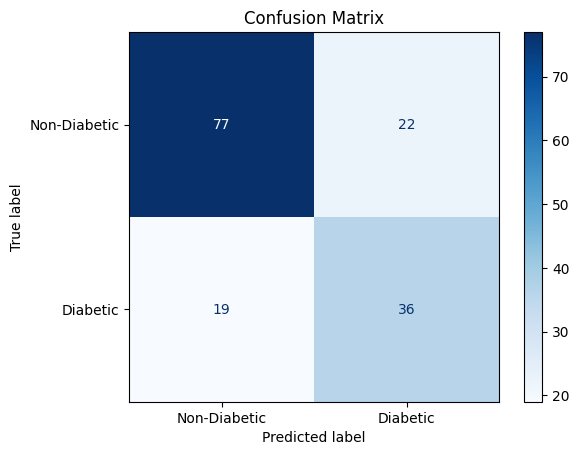


=== Fold 2 ===
TRAIN SAMPLE SIZE: 614
TEST SAMPLE SIZE: 154
Predicted:  [0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 1]
Correct:    [1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 1]
              precision    recall  f1-score   support

Non-Diabetic       0.84      0.76      0.79       107
    Diabetic       0.54      0.66      0.60        47

    accuracy                           0.73       154
   macro avg       0.69      0.71      0.70       154
weighted avg   

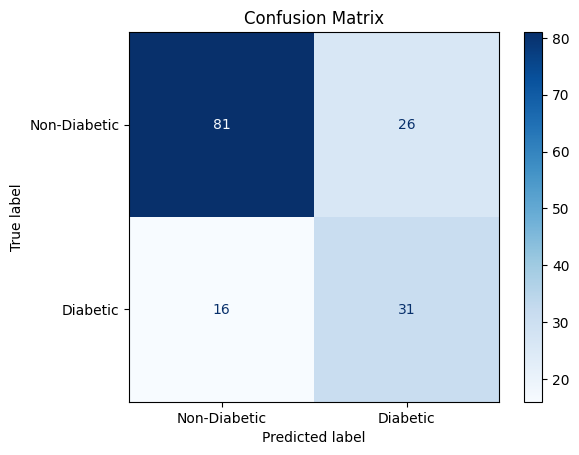


=== Fold 3 ===
TRAIN SAMPLE SIZE: 614
TEST SAMPLE SIZE: 154
Predicted:  [1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0
 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0]
Correct:    [1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0
 1 0 0 1 1 0]
              precision    recall  f1-score   support

Non-Diabetic       0.74      0.87      0.80        93
    Diabetic       0.73      0.52      0.61        61

    accuracy                           0.73       154
   macro avg       0.73      0.70      0.70       154
weighted avg   

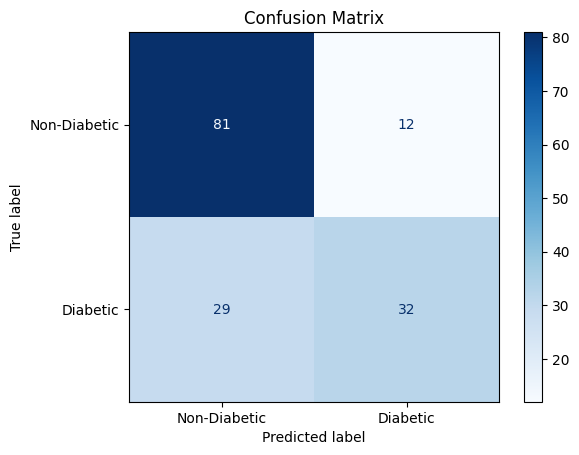


=== Fold 4 ===
TRAIN SAMPLE SIZE: 615
TEST SAMPLE SIZE: 153
Predicted:  [0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 1 1 1]
Correct:    [0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 0 1 0 1]
              precision    recall  f1-score   support

Non-Diabetic       0.80      0.86      0.83       106
    Diabetic       0.62      0.51      0.56        47

    accuracy                           0.75       153
   macro avg       0.71      0.68      0.69       153
weighted avg       

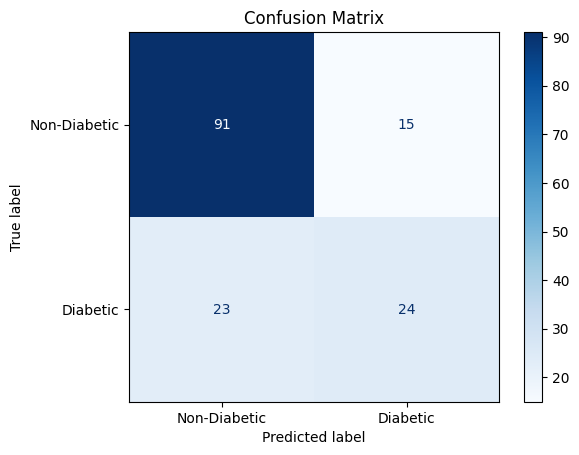


=== Fold 5 ===
TRAIN SAMPLE SIZE: 615
TEST SAMPLE SIZE: 153
Predicted:  [0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 1 0]
Correct:    [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1
 0 1 0 1 0]
              precision    recall  f1-score   support

Non-Diabetic       0.75      0.83      0.79        95
    Diabetic       0.67      0.55      0.60        58

    accuracy                           0.73       153
   macro avg       0.71      0.69      0.70       153
weighted avg       

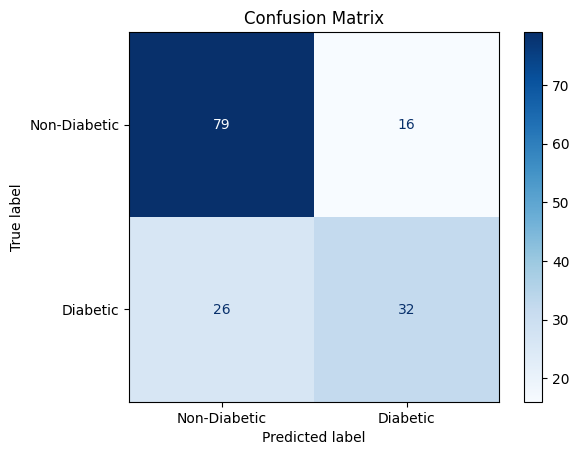

Average accuracy across folds: 0.7595563477916418
Average precision across folds: 0.6866499484116095
Average recall across folds: 0.5829259920567667
Average f1 across folds: 0.6267390722063901


In [ ]:
# Run the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    clf = DecisionTreeClassifier(max_depth=7, random_state=42)

    print(f"\n=== Fold {fold+1} ===")
    print("TRAIN SAMPLE SIZE:", len(train_index))
    print("TEST SAMPLE SIZE:", len(test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)

    print("Predicted: ", y_pred)
    print("Correct:   ", y_test)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

    draw_confusion_matrix(y_test, y_pred, ['Non-Diabetic', 'Diabetic'])
    precision_scores.append(pre)
    recall_scores.append(rec)
    f1_scores.append(f1)
    accuracy_scores.append(acc)

print("Average accuracy across folds:", np.mean(accuracy_scores))
print("Average precision across folds:", np.mean(precision_scores))
print("Average recall across folds:", np.mean(recall_scores))
print("Average f1 across folds:", np.mean(f1_scores))
